In [102]:
# Mengimport library/tools yang di perlukan
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import pymysql
from getpass import getpass
import warnings

# Mengabaikan Peringatan yang tidak penting
warnings.filterwarnings('ignore')

# Membuat Izin Akses supaya tetap menjaga keamanan Database
user = getpass('user : ')
host = getpass('host : ')
password = getpass('password : ')
database = getpass('database : ')

# Membuat Koneksi jika Akses di berikan
connection = pymysql.connect(
    user = user,
    host = host,
    password = password,
    database = database
)

# Membuat Query untuk Memperlihatkan Seluruh Tabel di dalam DataBase
query1 = 'SELECT * FROM review1'
query2 = 'SELECT * FROM review2'

# Akses Tabel ke-1
review1 = pd.read_sql(query1,connection)
last_number = review1.iloc[-1,0]

# Akses Tabel ke-2
review2 = pd.read_sql(query2,connection)
review2['index'] = review2['index'] + last_number

# Menggabungkan Kedua Tabel & Memodifikasi Tabel
data = pd.concat([review1, review2], axis=0)
data = data.rename(columns={'index':'No'})
data = data.set_index('No')
data['id'] = data['id'].astype('str').astype('str') 

In [103]:
data

,id,Gender,Customer Type,Age,Age_Category,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure_Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
No,,,,,,,,,,,,,,,,,,,,,
0,19556,Female,Loyal Customer,52,Middle-aged Adults,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,90035,Female,Loyal Customer,36,Young Adults,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,12360,Male,disloyal Customer,20,Young Adults,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,77959,Male,Loyal Customer,44,Middle-aged Adults,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,36875,Female,Loyal Customer,49,Middle-aged Adults,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39996,124766,Male,disloyal Customer,26,Young Adults,Business travel,Business,280,2,5,...,3,3,2,5,5,4,3,0,0.0,neutral or dissatisfied
39997,121293,Female,Loyal Customer,63,Elderly,Business travel,Business,2987,1,1,...,4,4,4,4,4,4,3,0,9.0,satisfied
39998,83357,Female,disloyal Customer,23,Young Adults,Business travel,Eco,1124,1,1,...,4,2,2,3,3,4,4,0,0.0,neutral or dissatisfied


In [104]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39886 entries, 0 to 40000
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 39886 non-null  object 
 1   Gender                             39886 non-null  object 
 2   Customer Type                      39886 non-null  object 
 3   Age                                39886 non-null  int64  
 4   Age_Category                       39886 non-null  object 
 5   Type of Travel                     39886 non-null  object 
 6   Class                              39886 non-null  object 
 7   Flight Distance                    39886 non-null  int64  
 8   Inflight wifi service              39886 non-null  int64  
 9   Departure_Arrival time convenient  39886 non-null  int64  
 10  Ease of Online booking             39886 non-null  int64  
 11  Gate location                      39886 non-null  int64  


In [105]:
data.isnull().sum()

id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Age_Category                         0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure_Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [106]:
data.drop_duplicates()

,id,Gender,Customer Type,Age,Age_Category,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure_Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
No,,,,,,,,,,,,,,,,,,,,,
0,19556,Female,Loyal Customer,52,Middle-aged Adults,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,90035,Female,Loyal Customer,36,Young Adults,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,12360,Male,disloyal Customer,20,Young Adults,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,77959,Male,Loyal Customer,44,Middle-aged Adults,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,36875,Female,Loyal Customer,49,Middle-aged Adults,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39996,124766,Male,disloyal Customer,26,Young Adults,Business travel,Business,280,2,5,...,3,3,2,5,5,4,3,0,0.0,neutral or dissatisfied
39997,121293,Female,Loyal Customer,63,Elderly,Business travel,Business,2987,1,1,...,4,4,4,4,4,4,3,0,9.0,satisfied
39998,83357,Female,disloyal Customer,23,Young Adults,Business travel,Eco,1124,1,1,...,4,2,2,3,3,4,4,0,0.0,neutral or dissatisfied


In [107]:
data.describe()

,Age,Flight Distance,Inflight wifi service,Departure_Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,39886.000000,39886.000000,39886.000000,39886.000000,39886.000000,39886.000000,39886.000000,39886.000000,39886.000000,39886.000000,39886.000000,39886.000000,39886.000000,39886.000000,39886.000000,39886.000000,39886.000000,39886.000000
mean,39.411372,1193.995387,2.727724,3.051722,2.756857,2.970165,3.213709,3.255252,3.442887,3.360126,3.381412,3.344030,3.631349,3.305220,3.644086,3.288522,14.528983,14.985333
std,15.094880,1001.718890,1.331456,1.530815,1.403590,1.283061,1.329658,1.347898,1.316441,1.332416,1.286048,1.315296,1.178102,1.268891,1.178784,1.314099,37.213417,37.647106
min,7.000000,31.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,844.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1305.000000,1280.000000


In [108]:
for a in data.columns:
    b = data.columns.get_loc(a)
    print(f'{a} : [{b}]')

id : [0]
Gender : [1]
Customer Type : [2]
Age : [3]
Age_Category : [4]
Type of Travel : [5]
Class : [6]
Flight Distance : [7]
Inflight wifi service : [8]
Departure_Arrival time convenient : [9]
Ease of Online booking : [10]
Gate location : [11]
Food and drink : [12]
Online boarding : [13]
Seat comfort : [14]
Inflight entertainment : [15]
On-board service : [16]
Leg room service : [17]
Baggage handling : [18]
Checkin service : [19]
Inflight service : [20]
Cleanliness : [21]
Departure Delay in Minutes : [22]
Arrival Delay in Minutes : [23]
satisfaction : [24]


1. Bagaimana perbedaan rating tentang Pelayanan Elektronic Maskapai antara kepuasan Loyal Customer & Disloyal Customer?

In [109]:
# Membagikan kategori dengan 2 kondisi
loyal = data[data['Customer Type'].isin(['Loyal Customer'])]
disloyal = data[data['Customer Type'].isin(['disloyal Customer'])]

# Melihat Perbedaan dari pengelompokkan Customer Type dan membuat Perhitungan rata-rata
loyal = loyal.pivot_table(
    index='satisfaction', 
    values= data.columns[[8,10,13,15,16,20]], 
    aggfunc= 'mean'
)

disloyal = disloyal.pivot_table(
    index= 'satisfaction',
    values= data.columns[[8,10,13,15,16,20]],
    aggfunc= 'mean'
)

# Menampilkan masing-masing hasil
loyal

,Ease of Online booking,Inflight entertainment,Inflight service,Inflight wifi service,On-board service,Online boarding
satisfaction,,,,,,
neutral or dissatisfied,2.616343,2.831906,3.324320,2.401842,2.992856,2.744111
satisfied,2.932882,4.062715,3.960572,3.085683,3.863787,4.058632


In [110]:
disloyal

,Ease of Online booking,Inflight entertainment,Inflight service,Inflight wifi service,On-board service,Online boarding
satisfaction,,,,,,
neutral or dissatisfied,2.379336,3.058598,3.578313,2.382621,3.085433,2.407083
satisfied,3.696717,3.129661,4.097941,3.728993,3.738453,3.651085


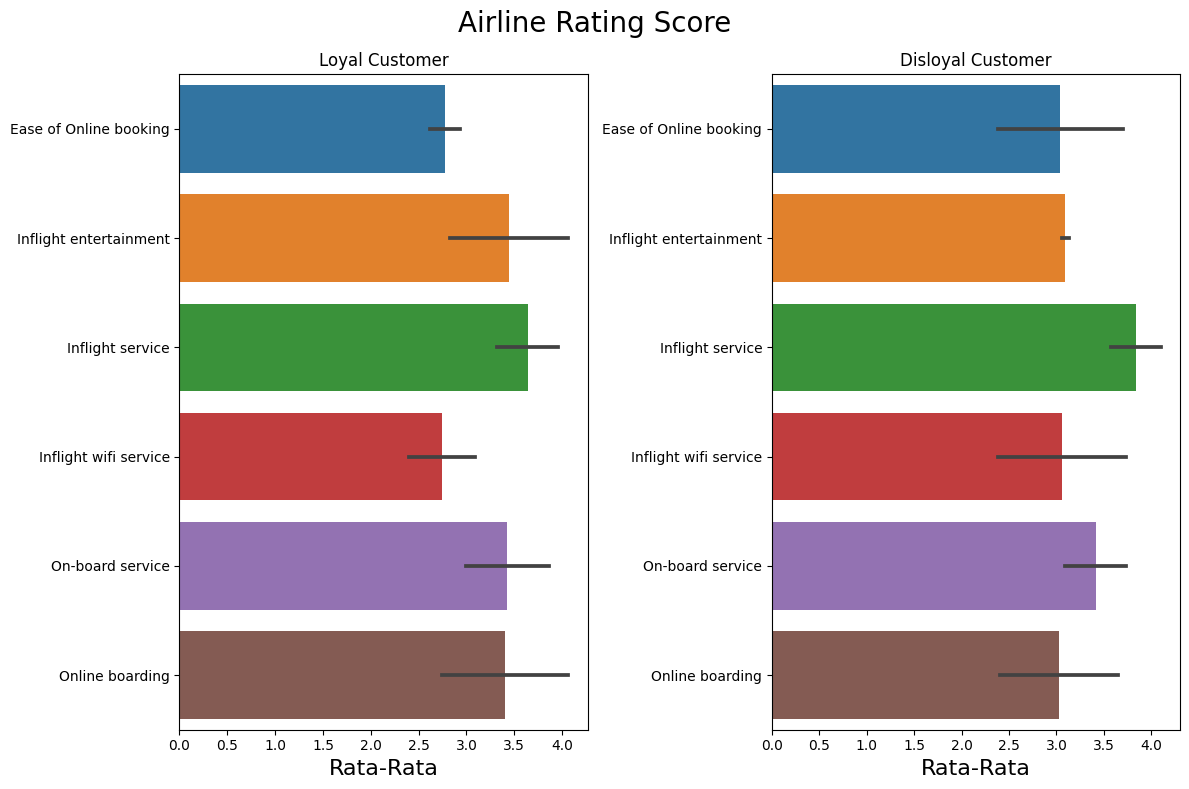

In [111]:
# Membuat canvas ukuran 1x3
cv, xe = plt.subplots(1, 2, figsize=(12,8))

# Membuat list Judul setiap distribusi data
customer = [loyal,disloyal]
no1_col = ['Loyal Customer','Disloyal Customer']

# Melakukan Iterasi untuk memvisualisasikan data secara sekaligus
for a, b, c in zip(xe.flatten(), customer, no1_col):
    sns.barplot(data=b, ax=a, orient='h')
    a.set_title(c)
    a.set_xlabel('Rata-Rata',fontsize=16)

# Mengatur Layout
cv.suptitle('Airline Rating Score',fontsize=20)
plt.tight_layout()
plt.show()

2. Layanan apa yang paling mempengaruhi tingkat kepuasan pelanggan?

In [112]:
# Memilih kondisi tingkat kepuasan netral/dissatisfied
select1 = data[data['satisfaction'].isin(['neutral or dissatisfied'])]

# Mengelompokkan tingkat kepuasan berdasarkan Age_Category
age_dissat = select1.groupby(['Age_Category'])[data.columns[8:22]].mean()
age_dissat = age_dissat.reset_index()
age_dissat

,Age_Category,Inflight wifi service,Departure_Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
0,Children,2.420752,3.410131,2.424020,2.897059,2.905229,2.397059,2.878268,2.932190,3.154412,3.174020,3.633170,3.209150,3.685458,2.922386
1,Elderly,2.375642,3.425165,2.522377,2.973955,3.017241,3.030081,3.279897,2.887014,2.981291,2.743947,3.188188,3.107117,3.194424,3.005503
2,Middle-aged Adults,2.404494,3.208729,2.635696,2.961394,3.014837,2.926102,3.179343,2.829012,2.923509,2.805820,3.129069,2.991357,3.143763,2.902478
3,Teenagers,2.416295,3.358817,2.481585,3.020089,2.914621,2.401228,2.895089,2.945312,3.090960,3.237165,3.661830,3.174107,3.677455,2.926897
4,Young Adults,2.391429,2.928682,2.544446,3.000514,2.914295,2.451238,2.916350,2.912650,3.059295,3.101223,3.506834,3.023533,3.522043,2.921796


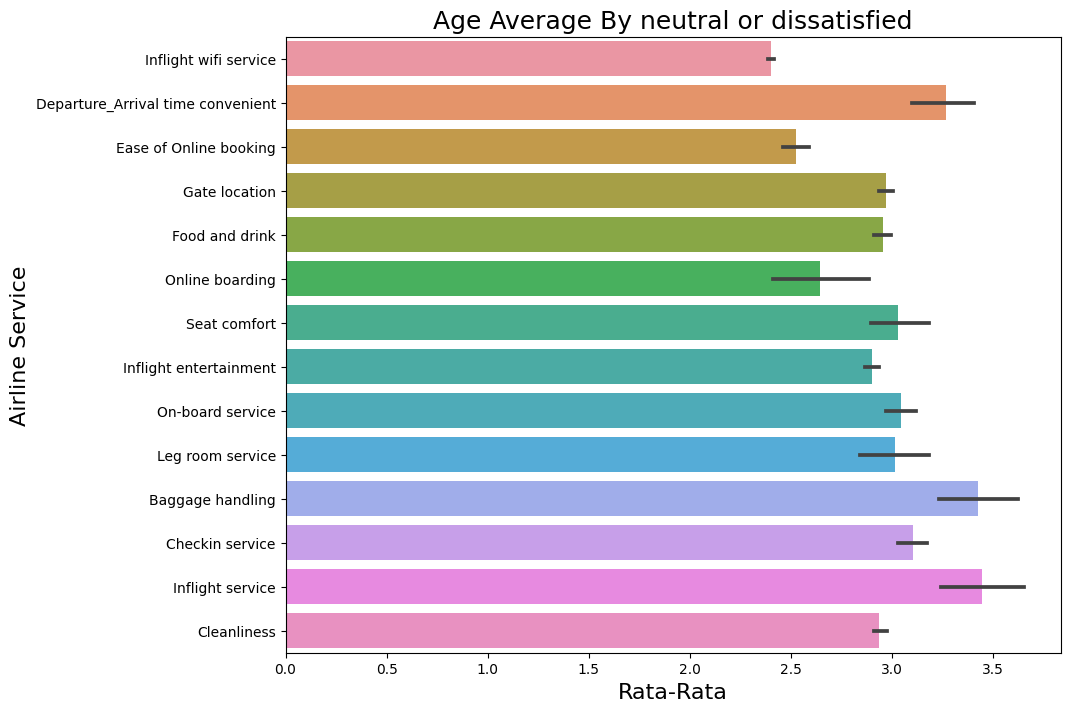

In [113]:
# Memvisualisasikan data dengan Diagram Batang
plt.figure(figsize=(10, 8))
sns.barplot(data=age_dissat, orient='h')
plt.xlabel('Rata-Rata',fontsize=16)
plt.ylabel('Airline Service',fontsize=16)
plt.title('Age Average By neutral or dissatisfied',fontsize=18)
plt.show()

In [114]:
# Memilih kondisi tingkat kepuasan satisfied
select2 = data[data['satisfaction'].isin(['satisfied'])]

# Mengelompokkan tingkat kepuasan berdasarkan Age_Category
age_sat = select2.groupby(['Age_Category'])[data.columns[8:22]].mean()
age_sat = age_sat.reset_index()
age_sat

,Age_Category,Inflight wifi service,Departure_Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
0,Children,3.500000,3.281553,3.291262,2.859223,3.233010,3.548544,3.106796,3.266990,3.422330,3.281553,3.922330,3.398058,3.898058,3.247573
1,Elderly,3.118182,3.007071,2.945455,2.908081,3.427273,3.925253,3.881818,3.901010,3.776768,3.830303,3.875758,3.505051,3.860606,3.622222
2,Middle-aged Adults,3.083412,2.964193,2.941956,2.967116,3.477816,4.120994,4.129659,4.078923,4.000522,4.050840,4.039148,3.726589,4.040296,3.798726
3,Teenagers,3.470930,3.139535,3.281008,3.063953,3.645349,3.813953,3.569767,3.645349,3.523256,3.187984,3.810078,3.403101,3.784884,3.633721
4,Young Adults,3.225081,2.872168,3.097896,2.941100,3.662783,3.902265,3.776375,3.853560,3.672492,3.501942,3.882039,3.549353,3.909709,3.730097


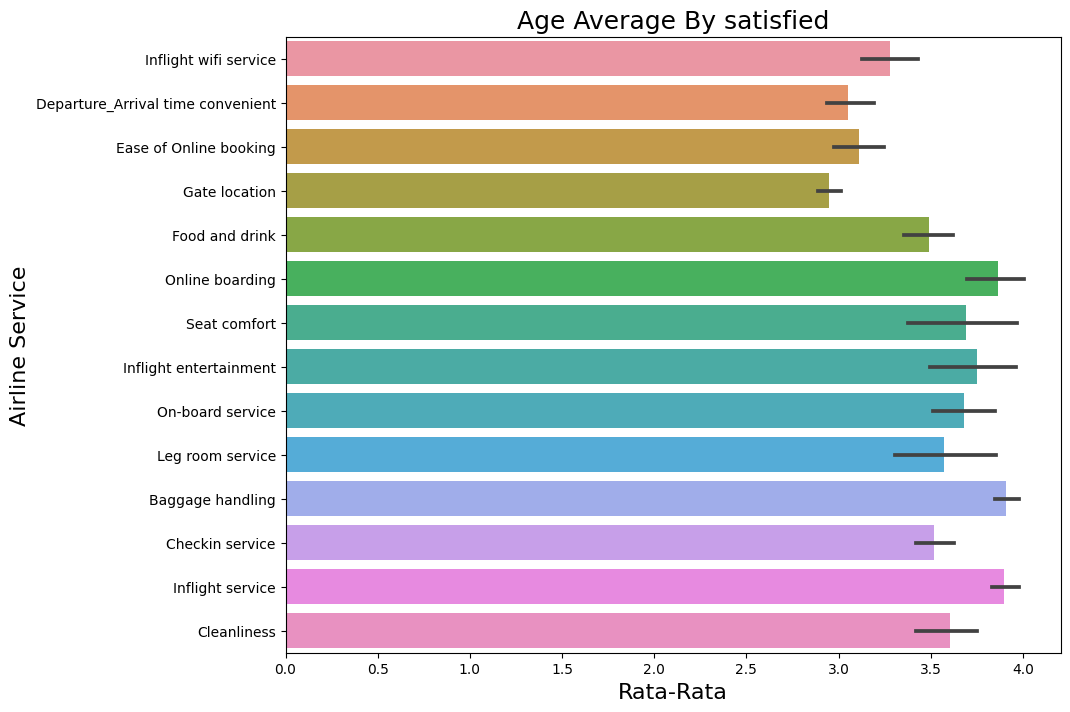

In [115]:
# Memvisualisasikan data dengan Diagram Batang
plt.figure(figsize=(10, 8))
sns.barplot(data=age_sat, orient='h')
plt.xlabel('Rata-Rata',fontsize=16)
plt.ylabel('Airline Service',fontsize=16)
plt.title('Age Average By satisfied',fontsize=18)
plt.show()

3. Apakah ada hubungan tentang kepuasan dari kualitas produk-produk airline

In [116]:
data['Class'].value_counts()

Class
Business    19122
Eco         17840
Eco Plus     2924
Name: count, dtype: int64

In [117]:
# Mengambil data berdasakan Class airline
select1_class = data[data['Class'].isin(['Business'])]

classProduct1 = select1_class.groupby(['satisfaction'])[data.columns[[8,12,14,15,17,18]]].corr()
classProduct1 = classProduct1.reset_index().rename(columns={'level_1':'correlation'})
classProduct1

,satisfaction,correlation,Inflight wifi service,Food and drink,Seat comfort,Inflight entertainment,Leg room service,Baggage handling
0,neutral or dissatisfied,Inflight wifi service,1.000000,0.177063,0.188142,0.385739,0.291065,0.311934
1,neutral or dissatisfied,Food and drink,0.177063,1.000000,0.512227,0.532697,0.001004,0.006626
2,neutral or dissatisfied,Seat comfort,0.188142,0.512227,1.000000,0.505205,-0.058421,-0.051072
3,neutral or dissatisfied,Inflight entertainment,0.385739,0.532697,0.505205,1.000000,0.263907,0.401941
4,neutral or dissatisfied,Leg room service,0.291065,0.001004,-0.058421,0.263907,1.000000,0.420715
5,neutral or dissatisfied,Baggage handling,0.311934,0.006626,-0.051072,0.401941,0.420715,1.000000
6,satisfied,Inflight wifi service,1.000000,-0.018537,-0.039502,0.022041,0.055272,0.092281
7,satisfied,Food and drink,-0.018537,1.000000,0.310953,0.256102,-0.060810,-0.031163
8,satisfied,Seat comfort,-0.039502,0.310953,1.000000,0.332948,0.047514,-0.008607
9,satisfied,Inflight entertainment,0.022041,0.256102,0.332948,1.000000,0.528874,0.550458


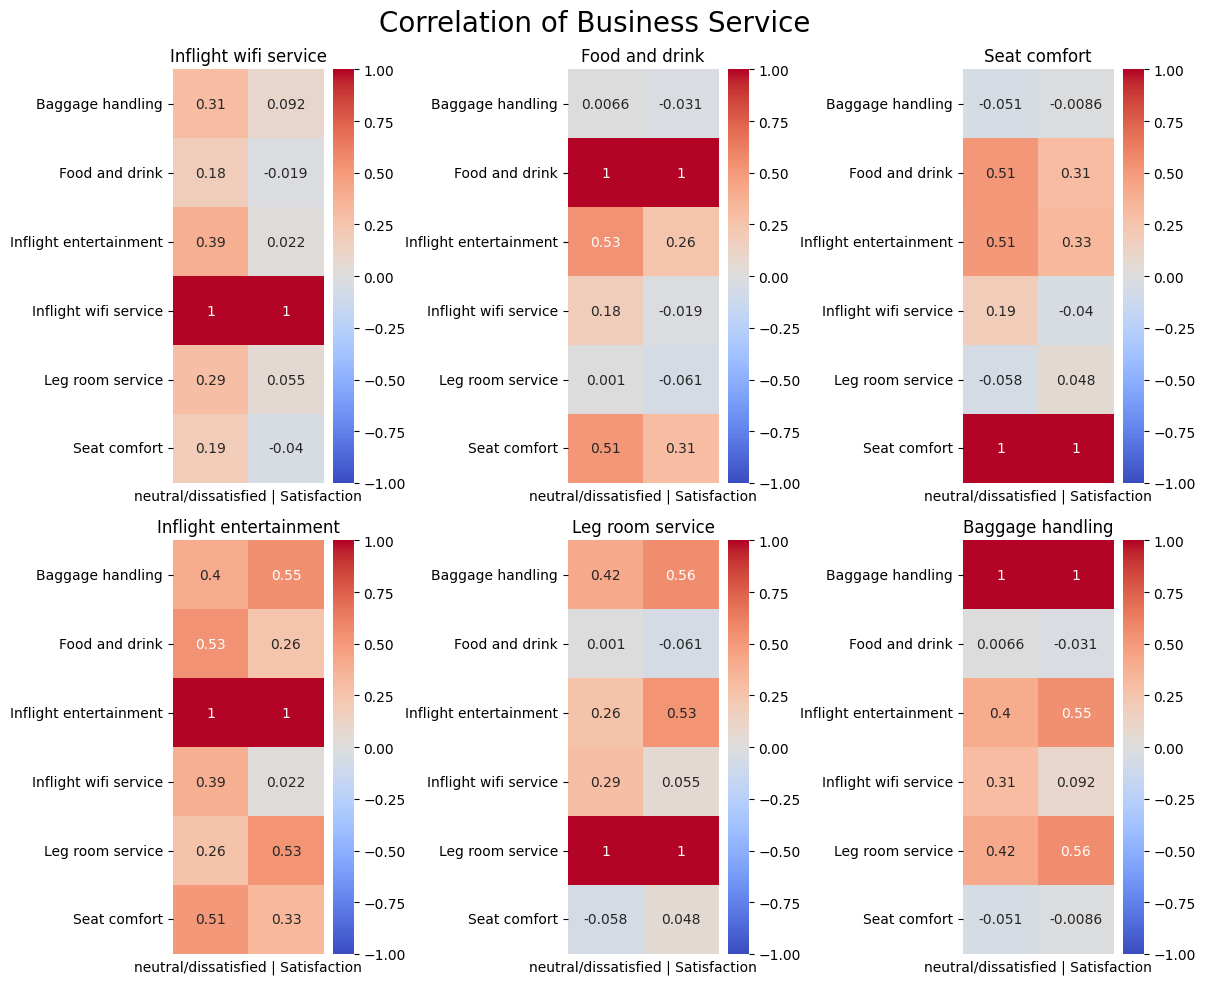

In [118]:
# Membuat list dari pivot table
products1 = []
product_titles1 = classProduct1.columns[2:]

# Membuat pivot table dengan cara Iterasi
for attribute1 in product_titles1:
    produk1 = classProduct1.pivot_table(index='correlation', columns='satisfaction', values=attribute1)
    products1.append(produk1)
    
# Membuat Canvas 2x3
canvas1, axes1 = plt.subplots(2, 3, figsize=(12, 10))

# Melakukan iterasi supaya memvisualisasikan data sekaligus
for ax, product, title in zip(axes1.flatten(), products1, product_titles1):
    sns.heatmap(data=product, annot=True, cmap='coolwarm', center=0, ax=ax, vmin=-1, vmax=1)
    ax.set_title(title)
    ax.set_xlabel('neutral/dissatisfied | Satisfaction')
    ax.set_xticks(np.arange(0),labels='')
    ax.set_ylabel('')

# Mengatur Layout
canvas1.suptitle('Correlation of Business Service',fontsize=20)
plt.tight_layout()
plt.show()

In [119]:
# Mengambil data berdasakan Class airline
select2_class = data[data['Class'].isin(['Eco'])]

classProduct2 = select2_class.groupby(['satisfaction'])[data.columns[[8,12,14,15,17,18]]].corr()
classProduct2 = classProduct2.reset_index().rename(columns={'level_1':'correlation'})
classProduct2

,satisfaction,correlation,Inflight wifi service,Food and drink,Seat comfort,Inflight entertainment,Leg room service,Baggage handling
0,neutral or dissatisfied,Inflight wifi service,1.000000,0.090556,0.050885,0.089463,0.106224,0.022926
1,neutral or dissatisfied,Food and drink,0.090556,1.000000,0.673787,0.786450,-0.027461,-0.014706
2,neutral or dissatisfied,Seat comfort,0.050885,0.673787,1.000000,0.639051,-0.050518,-0.035972
3,neutral or dissatisfied,Inflight entertainment,0.089463,0.786450,0.639051,1.000000,0.025880,0.184317
4,neutral or dissatisfied,Leg room service,0.106224,-0.027461,-0.050518,0.025880,1.000000,0.161328
5,neutral or dissatisfied,Baggage handling,0.022926,-0.014706,-0.035972,0.184317,0.161328,1.000000
6,satisfied,Inflight wifi service,1.000000,0.158765,0.147415,0.237706,0.161979,0.046717
7,satisfied,Food and drink,0.158765,1.000000,0.689389,0.737706,-0.085052,-0.111208
8,satisfied,Seat comfort,0.147415,0.689389,1.000000,0.656786,-0.068198,-0.110305
9,satisfied,Inflight entertainment,0.237706,0.737706,0.656786,1.000000,0.060683,0.078075


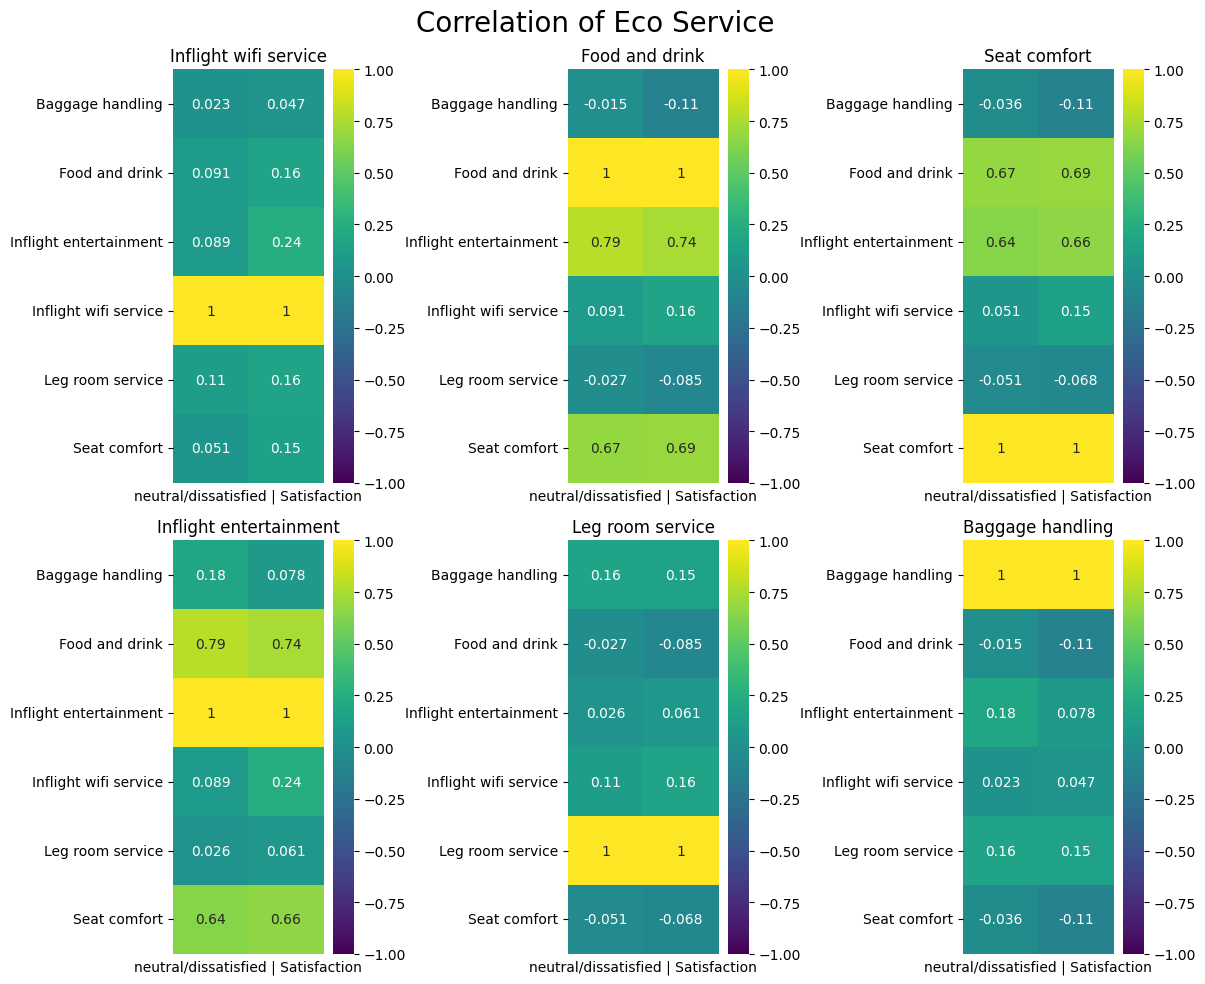

In [120]:
# Membuat list dari pivot table
products2 = []
product_titles2 = classProduct2.columns[2:]

# Membuat pivot table dengan cara Iterasi
for attribute2 in product_titles2:
    produk2 = classProduct2.pivot_table(index='correlation', columns='satisfaction',values=attribute2)
    products2.append(produk2)

# Membuat Canvas 2x3
canvas2, axes2 = plt.subplots(2, 3, figsize=(12, 10))

# Melakukan iterasi supaya memvisualisasikan data sekaligus
for ax2, product2, title2 in zip(axes2.flatten(), products2, product_titles2):
    sns.heatmap(data=product2, annot=True, cmap='viridis', center=0, ax=ax2, vmin=-1, vmax=1)
    ax2.set_title(title2)
    ax2.set_xlabel('neutral/dissatisfied | Satisfaction')
    ax2.set_xticks(np.arange(0),labels='')
    ax2.set_ylabel('')

# Mengatur Layout
canvas2.suptitle('Correlation of Eco Service',fontsize=20)
plt.tight_layout()
plt.show()

In [121]:
# Mengambil data berdasakan Class airline
select3_class = data[data['Class'].isin(['Eco Plus'])]

classProduct3 = select3_class.groupby(['satisfaction'])[data.columns[[8,12,14,15,17,18]]].corr()
classProduct3 = classProduct3.reset_index().rename(columns={'level_1':'correlation'})
classProduct3

,satisfaction,correlation,Inflight wifi service,Food and drink,Seat comfort,Inflight entertainment,Leg room service,Baggage handling
0,neutral or dissatisfied,Inflight wifi service,1.000000,0.196117,0.127387,0.210940,0.167387,0.057737
1,neutral or dissatisfied,Food and drink,0.196117,1.000000,0.650496,0.757018,-0.005160,-0.005724
2,neutral or dissatisfied,Seat comfort,0.127387,0.650496,1.000000,0.609093,-0.044202,-0.025007
3,neutral or dissatisfied,Inflight entertainment,0.210940,0.757018,0.609093,1.000000,0.064828,0.242164
4,neutral or dissatisfied,Leg room service,0.167387,-0.005160,-0.044202,0.064828,1.000000,0.192699
5,neutral or dissatisfied,Baggage handling,0.057737,-0.005724,-0.025007,0.242164,0.192699,1.000000
6,satisfied,Inflight wifi service,1.000000,0.360115,0.321294,0.412063,0.165099,0.109583
7,satisfied,Food and drink,0.360115,1.000000,0.648997,0.717962,-0.024115,-0.057350
8,satisfied,Seat comfort,0.321294,0.648997,1.000000,0.622664,-0.058290,-0.082958
9,satisfied,Inflight entertainment,0.412063,0.717962,0.622664,1.000000,0.099297,0.080137


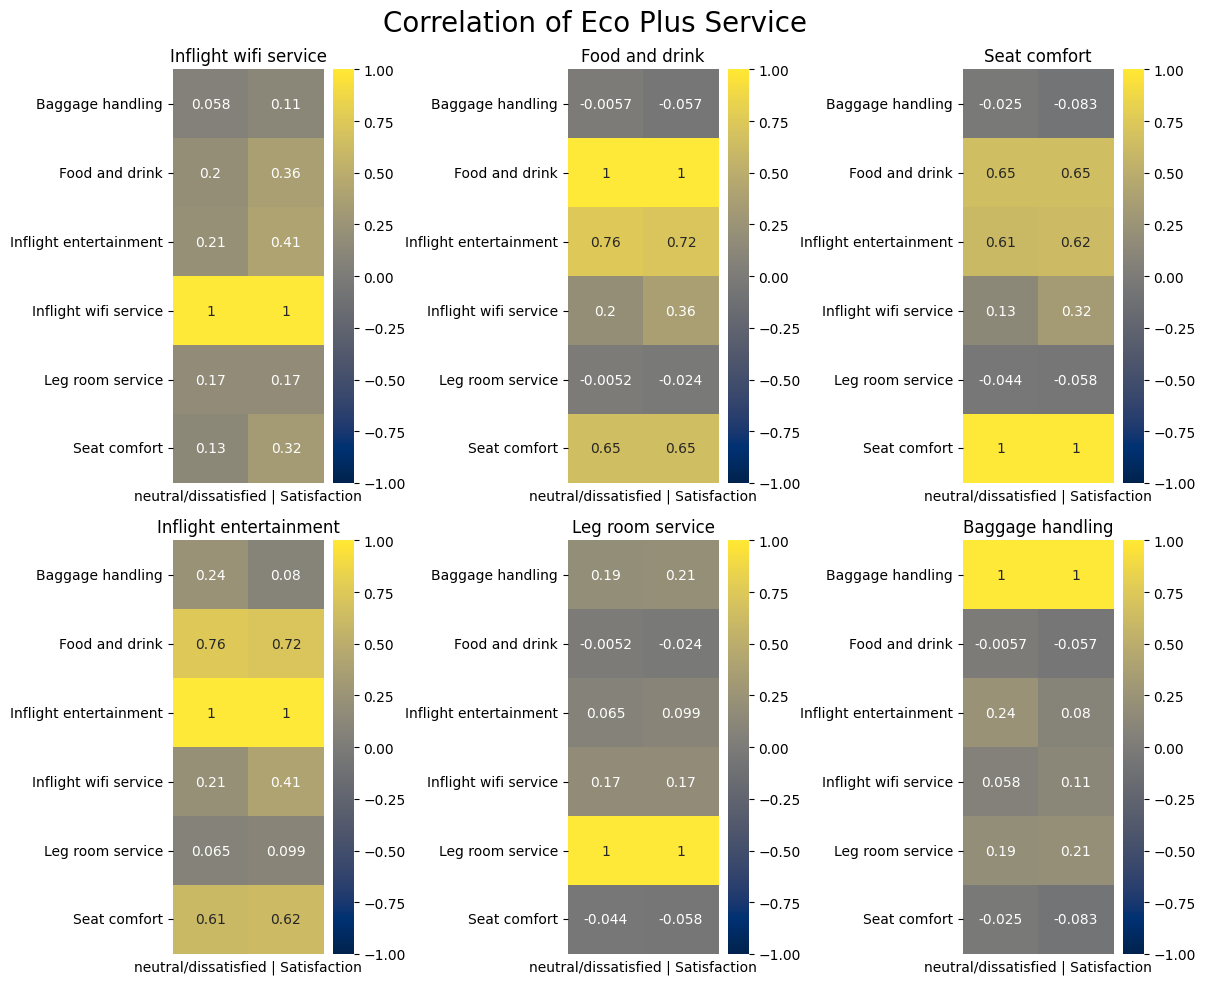

In [122]:
# Membuat list dari pivot table
products3 = []
product_titles3 = classProduct3.columns[2:]

# Membuat pivot table dengan cara Iterasi
for attribute3 in product_titles3:
    produk3 = classProduct3.pivot_table(index='correlation',columns='satisfaction',values=attribute3)
    products3.append(produk3)

# Membuat Canvas 2x3
canvas3, axes3 = plt.subplots(2, 3, figsize=(12, 10))

# Melakukan iterasi supaya memvisualisasikan data sekaligus
for ax3, product3, title3 in zip(axes3.flatten(), products3, product_titles3):
    sns.heatmap(data=product3, annot=True, cmap='cividis', center=0, ax=ax3, vmin=-1, vmax=1)
    ax3.set_title(title3)
    ax3.set_xlabel('neutral/dissatisfied | Satisfaction')
    ax3.set_xticks(np.arange(0),labels='')
    ax3.set_ylabel('')

# Mengatur Layout
canvas3.suptitle('Correlation of Eco Plus Service',fontsize=20)
plt.tight_layout()
plt.show()